C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


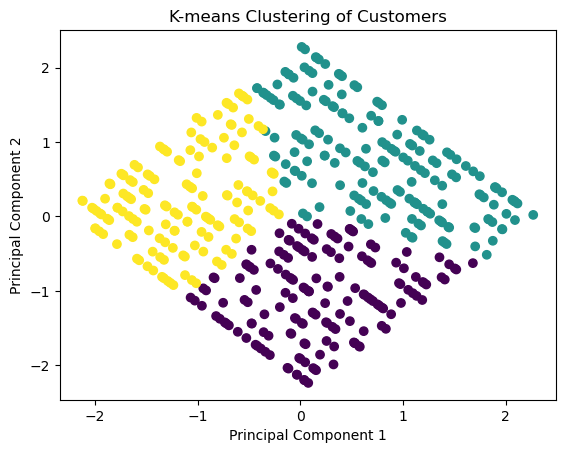

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generate random customer purchase data for demonstration
np.random.seed(42)
num_customers = 500

# Random purchase amounts for each customer
purchase_amounts = np.random.uniform(10, 1000, num_customers)

# Random frequency of purchases for each customer
purchase_frequency = np.random.randint(1, 20, num_customers)

# Combine the features into a matrix
customer_data = np.column_stack((purchase_amounts, purchase_frequency))

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Use KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(customer_data_scaled)

# Assign cluster labels to the data
customer_labels = kmeans.labels_

# Add cluster labels to the original data
customer_df = pd.DataFrame(customer_data, columns=['PurchaseAmount', 'PurchaseFrequency'])
customer_df['Cluster'] = customer_labels

# Visualize the clusters in 2D using PCA for dimensionality reduction
pca = PCA(n_components=2)
customer_data_pca = pca.fit_transform(customer_data_scaled)

plt.scatter(customer_data_pca[:, 0], customer_data_pca[:, 1], c=customer_labels, cmap='viridis')
plt.title('K-means Clustering of Customers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
